In [1]:
from imports import *
from information_conditions import Information_Conditions
from base_ecopg import BaseEcologicalPublicGood
from helper_functions import *
from simulation_and_results_functions import *

In [2]:
df_for_each_mode = {}
for mode in all_information_modes:
    filename = f"{mode}_unique_strategies_and_frequency.xlsx"
    filepath = os.path.join("..", "..", "..", filename)
    df_for_each_mode[mode] = pd.read_excel(filepath)

In [4]:
def get_basin_of_attraction_for_cooperation(df):
    high_cooperation = df[df['avg_coop'] > 0.95]
    total_frequency = np.round(high_cooperation['frequency'].sum(),2)
    return total_frequency

#get dictionary with basin of attraction for cooperation for each information condition
size_of_basin_of_attraction_each_mode = {}
for mode, df in df_for_each_mode.items():
    size_of_basin_of_attraction_each_mode[mode] = get_basin_of_attraction_for_cooperation(df)

print(size_of_basin_of_attraction_each_mode)


{'only_action_history_information': np.float64(3.0), 'only_state_information': np.int64(66), 'both_state_and_action_information': np.float64(64.9), 'no_information': np.int64(0)}


In [ ]:
def convert_final_point_to_numpy_array(final_point, number_of_states):

    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_states , 2)
    return array

def convert_obsdist_to_numpy_array(final_point, number_of_states):

    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_states)
    return array

for mode, df in df_for_each_mode.items():
    number_of_states = Information_Conditions(BaseEcologicalPublicGood(), mode).Q
    
    # df["final_point"] = df["final_point"].apply(lambda x: convert_final_point_to_numpy_array(x, number_of_states))
    df["avg_obsdist"] = df["avg_obsdist"].apply(lambda x: convert_obsdist_to_numpy_array(x, number_of_states))




AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [77]:
print(df_for_each_mode["only_action_history_information"].head())

                                         final_point  avg_coop  \
0  [[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1....  0.007990   
1  [[[0.1, 0.9], [0.0, 1.0], [0.0, 1.0], [0.0, 1....  0.005974   
2  [[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1....  0.006053   
3  [[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1....  0.010000   
4  [[[1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1....  0.009000   

                                         avg_obsdist  frequency  \
0  [[0.0, 0.006, 0.007, 0.985], [0.0, 0.006, 0.00...       61.2   
1  [[0.0, 0.009, 0.0, 0.989], [0.0, 0.009, 0.0, 0...        7.7   
2  [[0.0, 0.001, 0.007, 0.99], [0.0, 0.001, 0.007...        7.6   
3  [[0.0, 0.0, 0.017, 0.982], [0.0, 0.0, 0.017, 0...        2.2   
4  [[0.0, 0.016, 0.002, 0.981], [0.0, 0.016, 0.00...        2.0   

  strategy_classification  
0          (ALL D, ALL D)  
1          (ALL D, ALL D)  
2          (ALL D, ALL D)  
3             (ALL D, GT)  
4             (GT, ALL D)  


In [5]:
def plot_final_points(final_point_list, mode):
    info_condition =  Information_Conditions(BaseEcologicalPublicGood(), mode)
    number_of_states = info_condition.Q
    Oset = info_condition.Oset[0]
    fig, axes = plt.subplots(1, number_of_states, figsize=(5 * number_of_states, 5), squeeze=False)

    for i, axis in enumerate(axes.flat):
        axis.set(xlim = (0,1), ylim = (0,1), xlabel = 'agnt-1 coop. prob', ylabel = 'agnt-1 coop. prob')
        axes[0,i].set_title(Oset[i])        

    print(final_point_list)

    for final_point in final_point_list :
        for state in range(number_of_states):
            agent_1_coop_prob, agent_2_coop_prob = final_point[:, state, 0]
            axes[0,state].scatter(agent_1_coop_prob, agent_2_coop_prob, s = 50, color = 'red', alpha = 0.6)

    plt.tight_layout()
                        

0    [[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1....
1    [[[0.1, 0.9], [0.0, 1.0], [0.0, 1.0], [0.0, 1....
Name: final_point, dtype: object


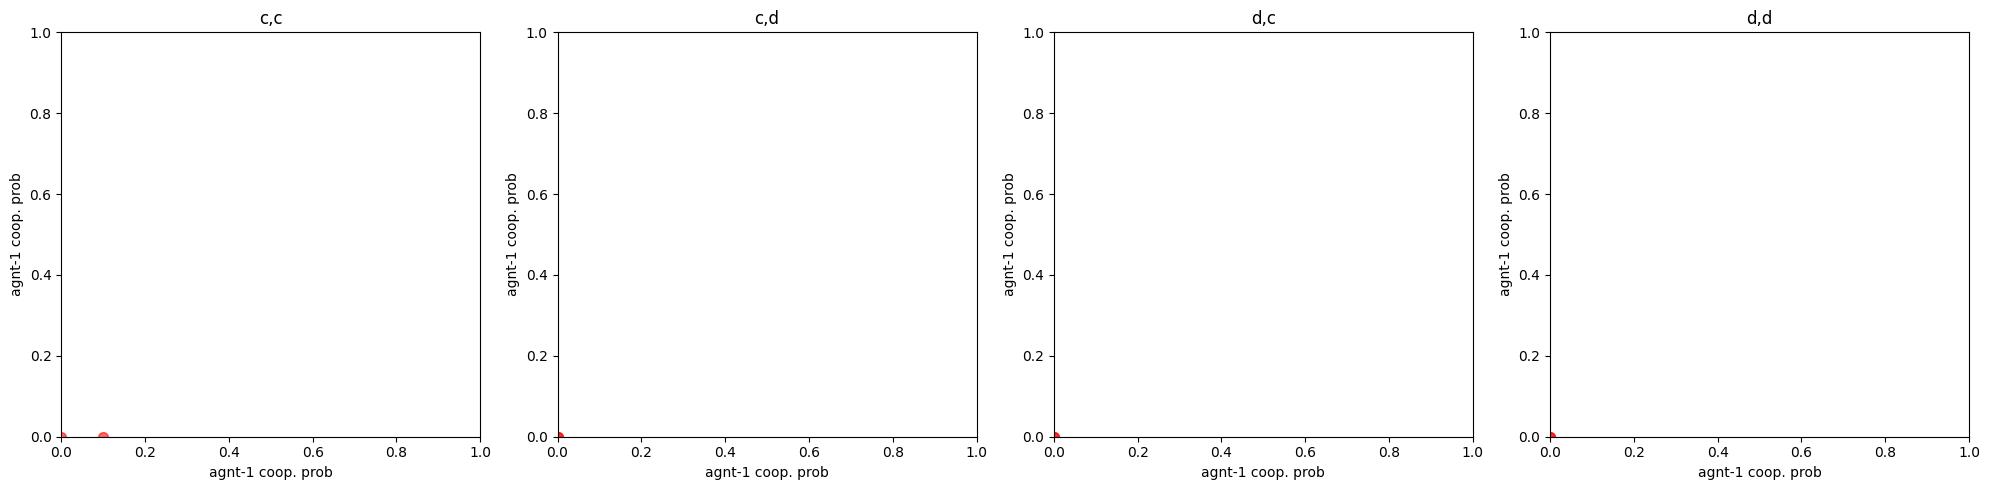

In [6]:
mode = 'only_action_history_information'
final_point_list = df_for_each_mode["only_action_history_information"]["final_point"]
plot_final_points(final_point_list[0:2], mode)



In [81]:
def classify_final_point(final_point):
    final_point_only_coop = final_point[:,:,0]
    agent_1_strategy, agent_2_strategy = final_point_only_coop[0, :], final_point_only_coop[1, :]
    agent_1_classification, agent_2_classification = classify_strategy(agent_1_strategy), classify_strategy(agent_2_strategy)

    return (agent_1_classification, agent_2_classification)

In [82]:
classify_final_point(final_point_list[9])

('ALL D', 'other')

In [83]:
def classify_final_point(final_point):
    final_point_only_coop = final_point[:,:,0]
    agent_1_strategy, agent_2_strategy = final_point_only_coop[0, :], final_point_only_coop[1, :]
    agent_1_classification, agent_2_classification = classify_strategy(agent_1_strategy), classify_strategy(agent_2_strategy)

    return (agent_1_classification, agent_2_classification)


df_only_action = df_for_each_mode['only_action_history_information']
df_only_action['strategy_classification'] = df_only_action['final_point'].apply(classify_final_point)


df_only_action.to_excel("only_action_classified.xlsx")

In [78]:
df_both_only_state_and_action = df_for_each_mode['both_state_and_action_information']
df_both_only_state_and_action_only_prosperous = df_both_only_state_and_action.copy()
df_both_only_state_and_action_only_prosperous['final_point'] = df_both_only_state_and_action_only_prosperous['final_point'].apply(lambda x: x[:, 1::2,:])
df_both_only_state_and_action_only_prosperous['avg_obsdist'] = df_both_only_state_and_action_only_prosperous['avg_obsdist'].apply(lambda x: np.array(x)[:, 1::2])

df_both_only_state_and_action_only_prosperous.to_excel("both_state_and_action_only_prosperous.xlsx")

In [84]:
df_both_only_state_and_action_only_prosperous['strategy_classification'] = df_both_only_state_and_action_only_prosperous['final_point'].apply(classify_final_point)
df_both_only_state_and_action_only_prosperous.to_excel("both_state_and_action_only_prosperous_classified.xlsx")

Keep only classification and frequncy in array, and group accoridng to classification. Sort tuples so that aggregation allows (Gt, AllC) and (ALLC, GT) as the same thing

In [ ]:
df_both_state_and_action_only_label_and_frequency = pd.read_excel("both_state_and_action_only_prosperous_classified.xlsx")
df_both_state_and_action_only_label_and_frequency.drop(columns=['final_point','avg_coop', 'avg_obsdist', 'Unnamed: 0' ], inplace=True)
df_both_state_and_action_only_label_and_frequency.reset_index(drop=True, inplace=True)
df_both_state_and_action_only_label_and_frequency.head()

df_both_state_and_action_only_label_and_frequency['strategy_classification'] = df_both_state_and_action_only_label_and_frequency['strategy_classification'].apply(lambda x: tuple(sorted(ast.literal_eval(x))))
df_both_state_and_action_only_label_and_frequency['strategy_classification'] = df_both_state_and_action_only_label_and_frequency['strategy_classification'].apply(lambda x: 'other'if 'other' in x else x)
print(df_both_state_and_action_only_label_and_frequency)
df_both_state_and_action_only_label_and_frequency = df_both_state_and_action_only_label_and_frequency.groupby('strategy_classification').agg(frequency_ = ('frequency', 'sum'))
print(df_both_state_and_action_only_label_and_frequency)



df_both_state_and_action_only_label_and_frequency.to_excel("both_state_and_action_only_label_and_frequency.xlsx")



    frequency   strategy_classification
0        41.5            (ALL C, ALL C)
1        33.0            (ALL D, ALL D)
2         5.2              (WSLS, WSLS)
3         2.1  (Reverse GT, Reverse GT)
4         1.4            (ALL C, ALL C)
..        ...                       ...
76        0.1                     other
77        0.1                     other
78        0.1                     other
79        0.1                     other
80        0.1                     other

[81 rows x 2 columns]
                          frequency_
strategy_classification             
(ALL C, ALL C)                  45.2
(ALL D, ALL D)                  33.0
(GT, GT)                         0.5
(Reverse GT, Reverse GT)         2.1
(WSLS, WSLS)                     5.5
other                           13.7


In [109]:
df_only_action_label_and_frequency = pd.read_excel("only_action_classified.xlsx")
df_only_action_label_and_frequency.drop(
    columns=['final_point', 'avg_coop', 'avg_obsdist', 'Unnamed: 0'], 
    inplace=True
)
df_only_action_label_and_frequency.reset_index(drop=True, inplace=True)

# Process strategy classification
df_only_action_label_and_frequency['strategy_classification'] = df_only_action_label_and_frequency['strategy_classification'].apply(
    lambda x: tuple(sorted(ast.literal_eval(x)))
)
df_only_action_label_and_frequency['strategy_classification'] = df_only_action_label_and_frequency['strategy_classification'].apply(
    lambda x: 'other' if 'other' in x else x
)

# Group by strategy classification and sum frequencies
df_only_action_label_and_frequency = df_only_action_label_and_frequency.groupby(
    'strategy_classification'
).agg(frequency_=('frequency', 'sum'))

print(df_only_action_label_and_frequency)


df_only_action_label_and_frequency.to_excel("only_action_label_and_frequency.xlsx")

                         frequency_
strategy_classification            
(ALL D, ALL D)                 77.1
(ALL D, GT)                     4.8
(ALL D, Reverse GT)             0.1
(ALL D, WSLS)                   1.1
(GT, GT)                        0.1
other                          16.8


In [ ]:
def convert_final_point_to_numpy_array(final_point, number_of_states):

    flat = np.fromstring(final_point.replace('[', ' ').replace(']', ' '), sep=' ', dtype=float)
    array = flat.reshape(2, number_of_states , 2)
    return array